In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress all warnings (not recommended in practice, use specific filters instead)
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'crypto_data.csv')
data.head()

,date,symbol,open,high,low,close,volume usdt,tradecount,token,hour,day
0,12/25/2020 5:00,1INCHUSDT,0.2000,3.0885,0.2000,2.5826,35530516,48768,1INCH,5,Friday
1,12/25/2020 6:00,1INCHUSDT,2.5824,2.6900,2.2249,2.5059,22440875,31099,1INCH,6,Friday
2,12/25/2020 7:00,1INCHUSDT,2.5152,2.8870,2.3609,2.6237,21300426,33001,1INCH,7,Friday
3,12/25/2020 8:00,1INCHUSDT,2.6318,2.8247,2.4650,2.6134,17491813,30459,1INCH,8,Friday
4,12/25/2020 9:00,1INCHUSDT,2.6104,2.7498,2.5629,2.6365,9919400,21023,1INCH,9,Friday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   date         1048575 non-null  object 
 1   symbol       1048575 non-null  object 
 2   open         1048575 non-null  float64
 3   high         1048575 non-null  float64
 4   low          1048575 non-null  float64
 5   close        1048575 non-null  float64
 6   volume usdt  1048575 non-null  int64  
 7   tradecount   1048575 non-null  int64  
 8   token        1048575 non-null  object 
 9   hour         1048575 non-null  int64  
 10  day          1048575 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB


In [7]:
data.describe()

,open,high,low,close,volume usdt,tradecount,hour
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.189267e+03,1.195863e+03,1.182283e+03,1.189289e+03,8.122449e+06,9.739554e+03,1.150534e+01
std,5.750278e+03,5.780869e+03,5.717854e+03,5.750332e+03,3.347241e+07,3.057073e+04,6.921971e+00
min,5.560000e-06,5.760000e-06,5.100000e-06,5.560000e-06,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.829750e-01,2.858000e-01,2.799000e-01,2.829000e-01,2.119980e+05,7.790000e+02,6.000000e+00
50%,6.800000e+00,6.850000e+00,6.746500e+00,6.800000e+00,8.893510e+05,2.413000e+03,1.200000e+01
75%,8.239000e+01,8.305000e+01,8.170000e+01,8.238000e+01,3.550258e+06,7.297000e+03,1.800000e+01
max,6.863512e+04,6.900000e+04,6.845119e+04,6.863369e+04,3.005634e+09,2.319867e+06,2.300000e+01


In [11]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %H:%M')


In [13]:
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week
data['week'] = data['week'].astype(int)
data['year'] = data['date'].dt.year

In [18]:
data.tail()

,symbol,open,high,low,close,volume usdt,tradecount,token,hour,day,month,week,year,volatility
1048570,TRXUSDT,0.06844,0.06848,0.06824,0.06838,487438,1958,TRX,22,Monday,5,18,2023,0.351700
1048571,TRXUSDT,0.06838,0.06854,0.06838,0.06851,555890,1863,TRX,23,Monday,5,18,2023,0.233987
1048572,TRXUSDT,0.06851,0.06920,0.06805,0.06809,1485151,3917,TRX,0,Tuesday,5,18,2023,1.689934
1048573,TRXUSDT,0.06808,0.06811,0.06765,0.06767,795466,2692,TRX,1,Tuesday,5,18,2023,0.679970
1048574,TRXUSDT,0.06768,0.06772,0.06750,0.06752,1082819,3285,TRX,2,Tuesday,5,18,2023,0.325926


In [15]:
# volatility Change in that stock

data['volatility'] = (data['high'] - data['low']) / data['low'] * 100

In [17]:
## we found the the volatility so now removing the high and low columns
## and remove the open stock value because we have to see anyone of them (open or close) I choosen the close to seeing trends

data = data.drop(columns=['date','open','high','low'])
data.head()

In [20]:
data.head()

,symbol,close,volume usdt,tradecount,token,hour,day,month,week,year,volatility
0,1INCHUSDT,2.5826,35530516,48768,1INCH,5,Friday,12,52,2020,1444.250000
1,1INCHUSDT,2.5059,22440875,31099,1INCH,6,Friday,12,52,2020,20.904310
2,1INCHUSDT,2.6237,21300426,33001,1INCH,7,Friday,12,52,2020,22.283875
3,1INCHUSDT,2.6134,17491813,30459,1INCH,8,Friday,12,52,2020,14.592292
4,1INCHUSDT,2.6365,9919400,21023,1INCH,9,Friday,12,52,2020,7.292520


## Data Understanding

- In this time series study, we explore a broad spectrum of analytical and statistical methods to attempt to uncover hidden patterns, trends, and relevant determining elements. The work begins with exploratory data analysis, in which we analyze the data to gain knowledge about its distribution and characteristics

- symbol column is a type of the crypto coins

In [ ]:
data.isnull().sum()

symbol         0
close          0
volume usdt    0
tradecount     0
token          0
hour           0
day            0
month          0
week           0
year           0
volatility     0
dtype: int64

In [23]:
data.corr()

,close,volume usdt,tradecount,hour,month,week,year,volatility
close,1.000000,0.513625,0.409090,-0.000093,-0.012274,-0.012960,-0.000074,-0.000242
volume usdt,0.513625,1.000000,0.914540,0.005437,-0.031800,-0.033528,0.045147,0.000344
tradecount,0.409090,0.914540,1.000000,0.006691,-0.021635,-0.023617,0.058023,0.000943
hour,-0.000093,0.005437,0.006691,1.000000,0.000088,0.000095,-0.000656,-0.000209
month,-0.012274,-0.031800,-0.021635,0.000088,1.000000,0.968794,-0.200922,-0.001079
week,-0.012960,-0.033528,-0.023617,0.000095,0.968794,1.000000,-0.200922,-0.001089
year,-0.000074,0.045147,0.058023,-0.000656,-0.200922,-0.200922,1.000000,-0.000816
volatility,-0.000242,0.000344,0.000943,-0.000209,-0.001079,-0.001089,-0.000816,1.000000


In [46]:
data['symbol'].value_counts()

BTCUSDT      54116
ETHUSDT      54116
BNBUSDT      52032
LTCUSDT      51285
ADAUSDT      48198
ETCUSDT      46942
TRXUSDT      42804
LINKUSDT     41665
MATICUSDT    39243
ATOMUSDT     39182
ALGOUSDT     37900
DOGEUSDT     37576
DENTUSDT     36320
RVNUSDT      35616
HBARUSDT     35528
BCHUSDT      34086
COMPUSDT     29059
MKRUSDT      28382
SOLUSDT      27934
BALUSDT      27934
CRVUSDT      27840
DOTUSDT      27749
SUSHIUSDT    27445
AVAXUSDT     26926
AAVEUSDT     26373
FILUSDT      26363
1INCHUSDT    24672
SHIBUSDT     21413
ICPUSDT      21399
DYDXUSDT     18477
Name: symbol, dtype: int64

## Now EDA part

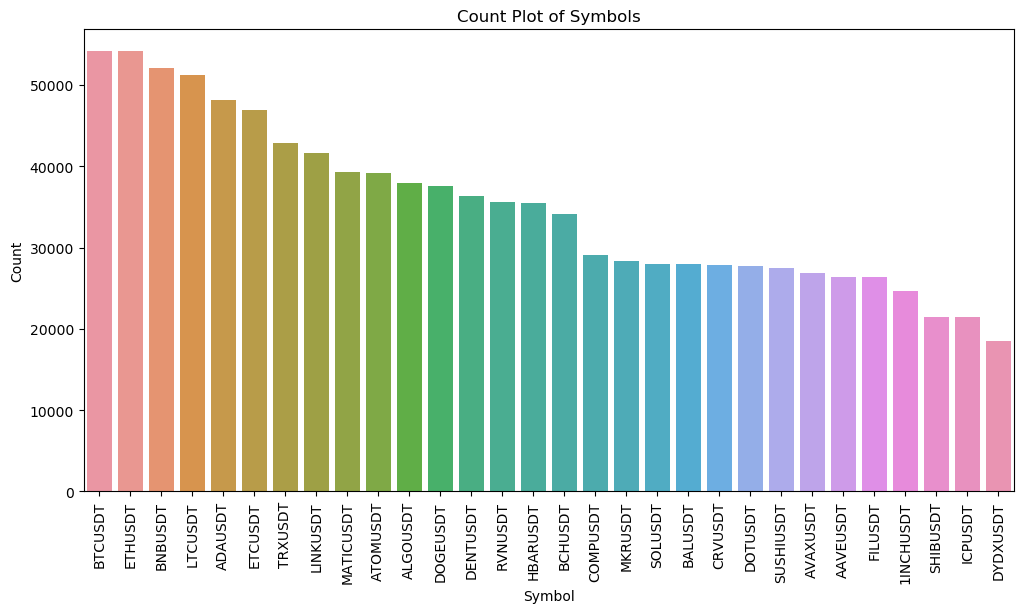

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='symbol', data=df, order=df['symbol'].value_counts().index)
plt.title('Count Plot of Symbols')
plt.xlabel('Symbol')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [29]:
unique_symbols = df['symbol'].unique()
print("Unique symbols in the dataset:")
print(unique_symbols)

Unique symbols in the dataset:
['1INCHUSDT' 'AAVEUSDT' 'ADAUSDT' 'ALGOUSDT' 'ATOMUSDT' 'AVAXUSDT'
 'BALUSDT' 'BCHUSDT' 'BNBUSDT' 'BTCUSDT' 'COMPUSDT' 'CRVUSDT' 'DENTUSDT'
 'DOGEUSDT' 'DOTUSDT' 'DYDXUSDT' 'ETCUSDT' 'ETHUSDT' 'FILUSDT' 'HBARUSDT'
 'ICPUSDT' 'LINKUSDT' 'LTCUSDT' 'MATICUSDT' 'MKRUSDT' 'RVNUSDT' 'SHIBUSDT'
 'SOLUSDT' 'SUSHIUSDT' 'TRXUSDT']


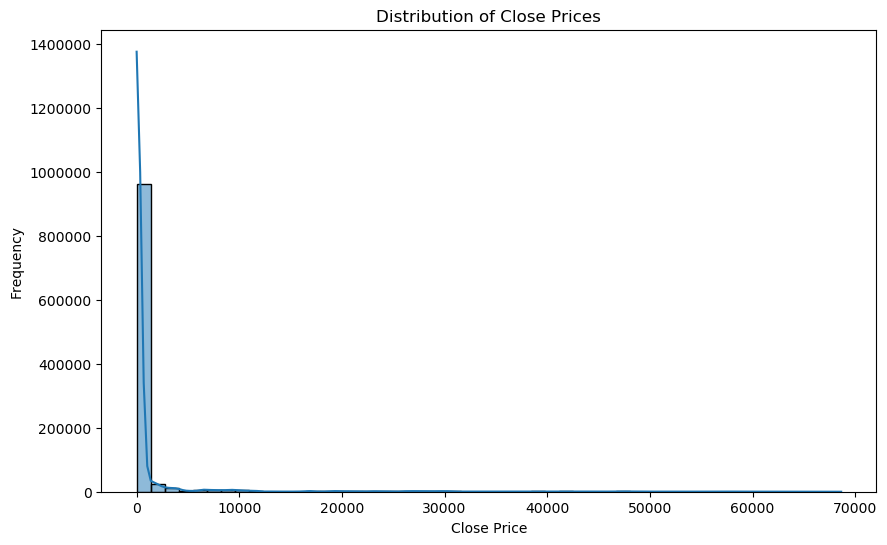

In [34]:
# Distribution of 'close' prices
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

In [47]:
data.head()

,symbol,close,volume usdt,tradecount,token,hour,day,month,week,year,volatility
0,1INCHUSDT,2.5826,35530516,48768,1INCH,5,Friday,12,52,2020,1444.250000
1,1INCHUSDT,2.5059,22440875,31099,1INCH,6,Friday,12,52,2020,20.904310
2,1INCHUSDT,2.6237,21300426,33001,1INCH,7,Friday,12,52,2020,22.283875
3,1INCHUSDT,2.6134,17491813,30459,1INCH,8,Friday,12,52,2020,14.592292
4,1INCHUSDT,2.6365,9919400,21023,1INCH,9,Friday,12,52,2020,7.292520


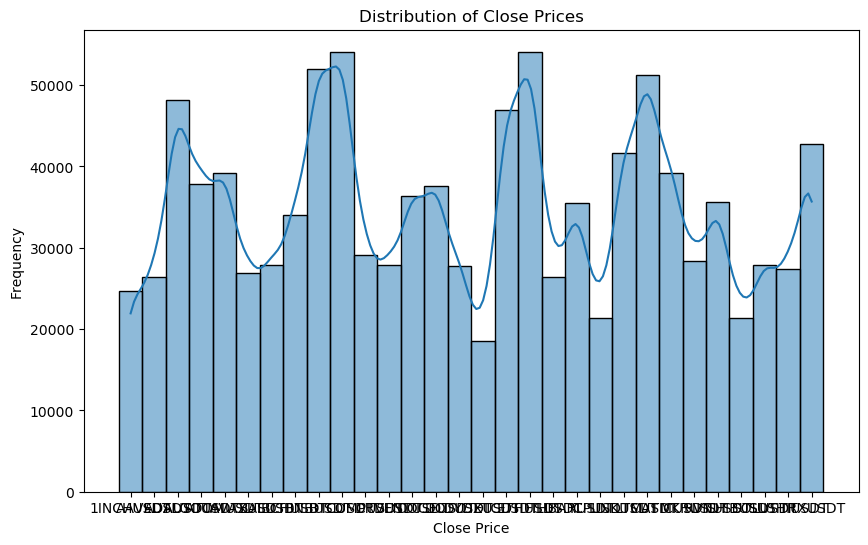

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data['symbol'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

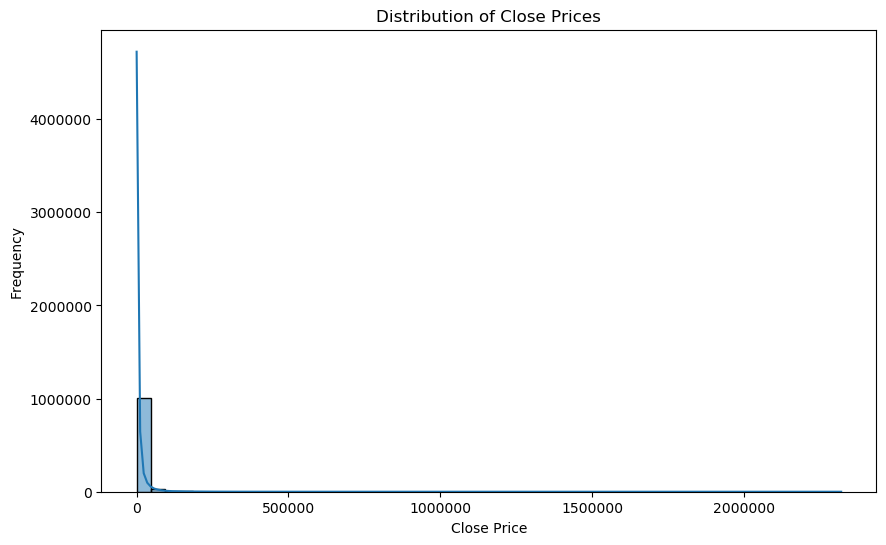

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['tradecount'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

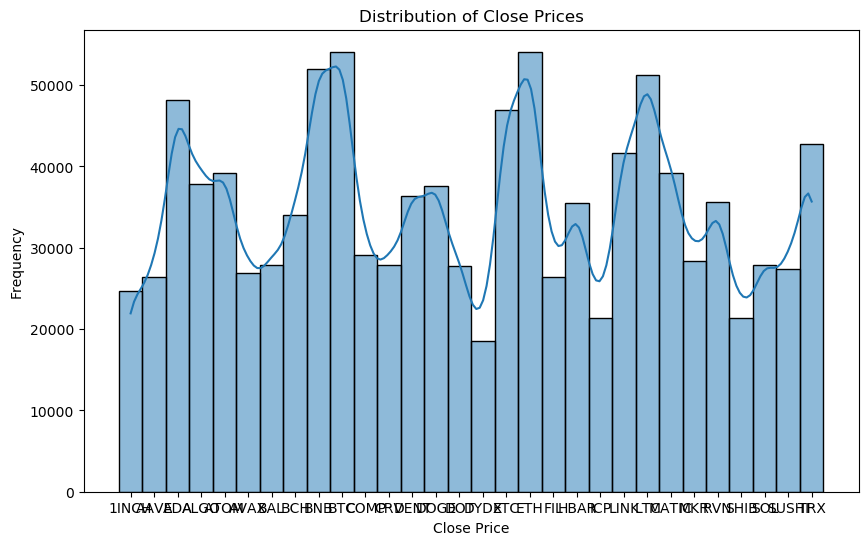

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data['token'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

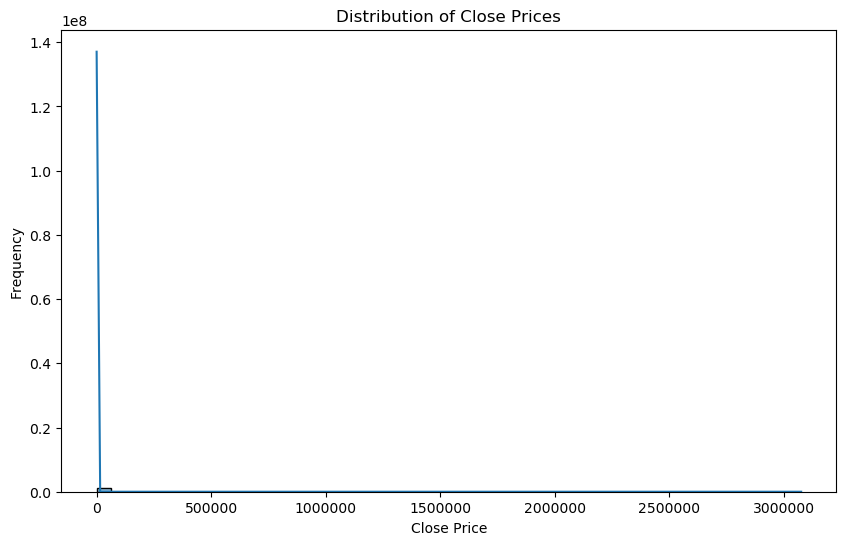

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data['volatility'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

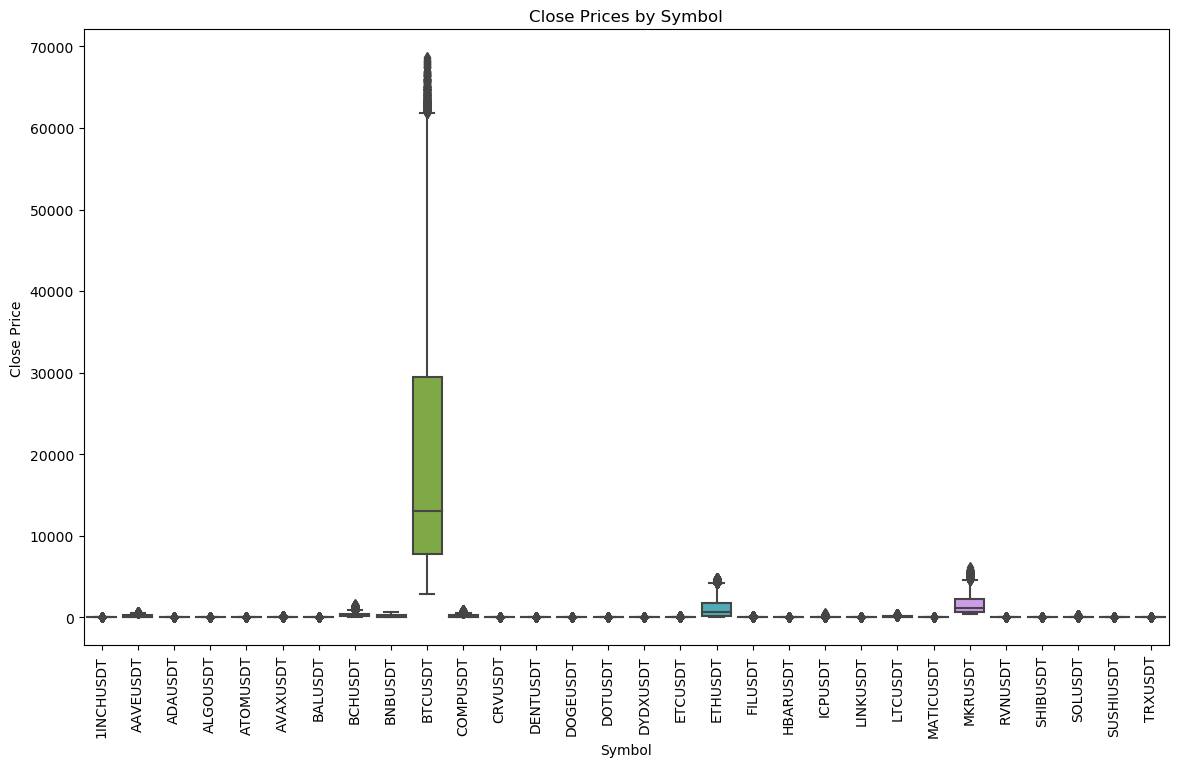

In [35]:
# Boxplot of 'close' prices by 'symbol'
plt.figure(figsize=(14, 8))
sns.boxplot(x='symbol', y='close', data=data)
plt.title('Close Prices by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Close Price')
plt.xticks(rotation=90)
plt.show()

In [40]:
## here we found some outlier but we did not remove it bcz in the stock market it can happens

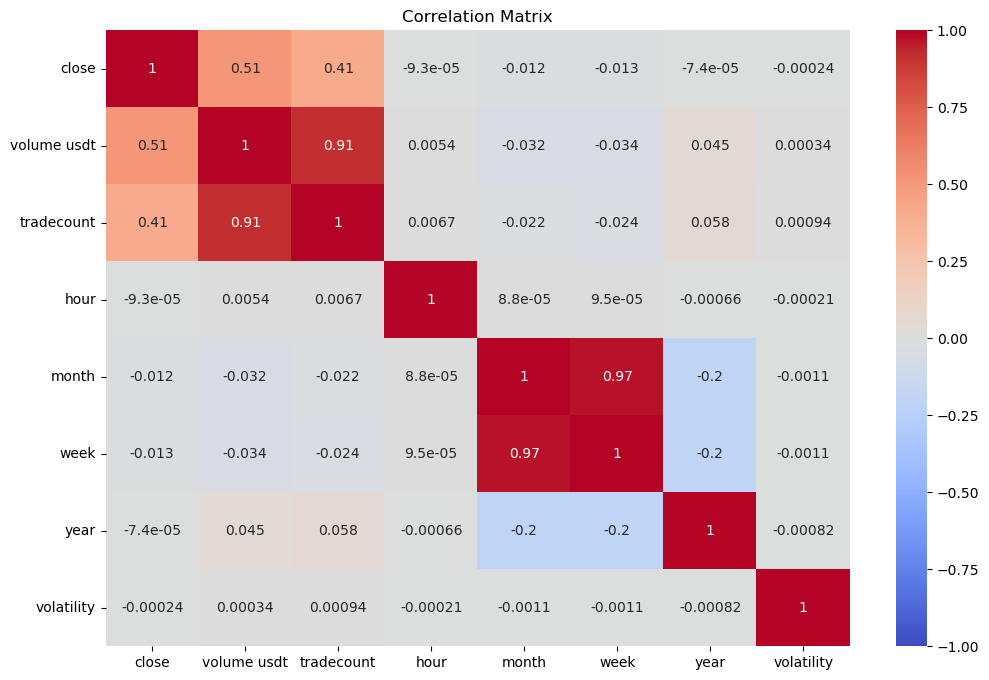

In [39]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

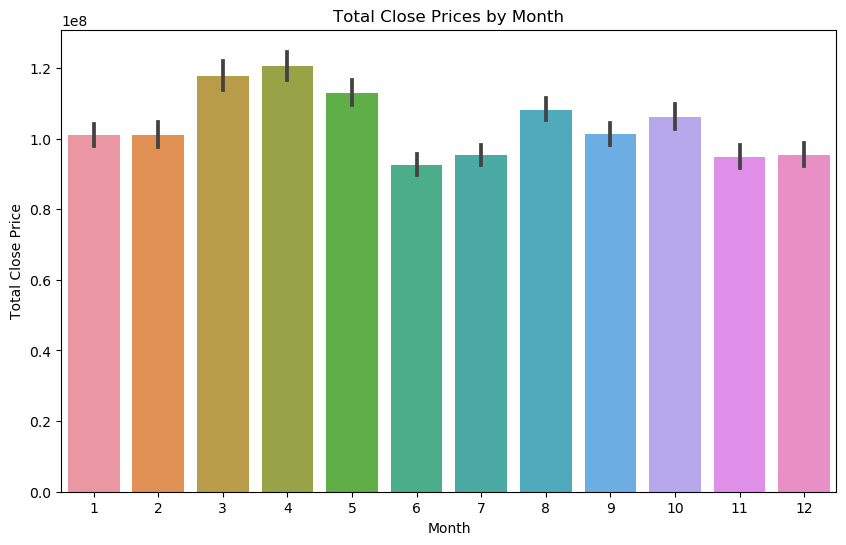

In [38]:
# Average close price by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='close', data=data, estimator=sum)
plt.title('Total Close Prices by Month')
plt.xlabel('Month')
plt.ylabel('Total Close Price')
plt.show()

###  months 3, 4 and 5 are very important as compare to other months

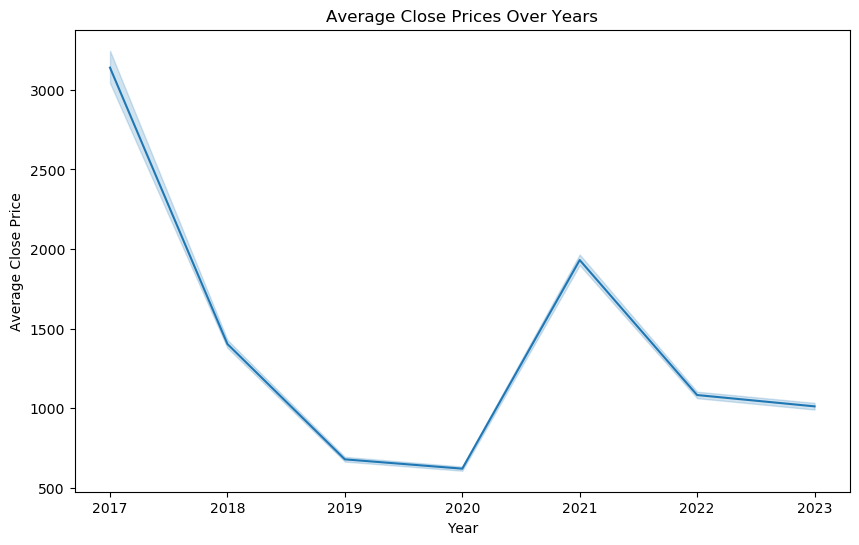

In [43]:
# Average close price over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='close', data=data)
plt.title('Average Close Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

### from above graph we conclude that the price of the stock very high in 2017 and very low at the 2019-20 (beacasue of pandamic)

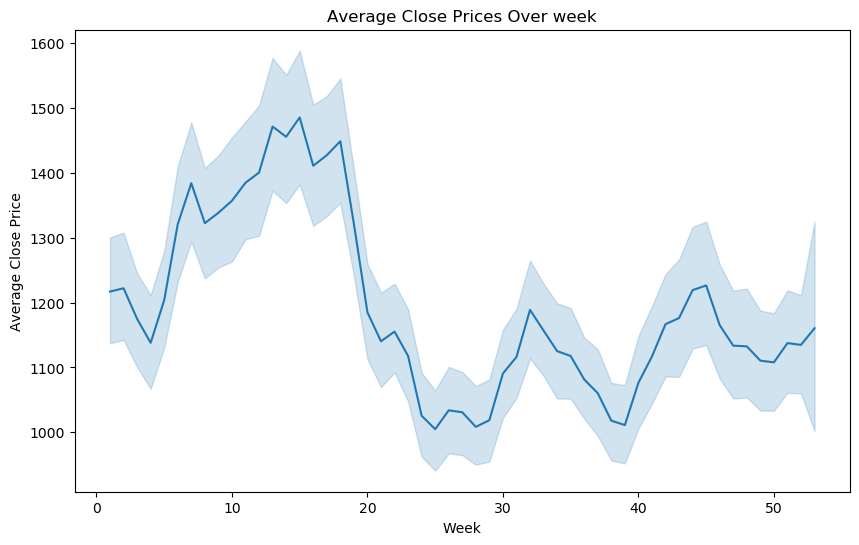

In [44]:
# Average close price over week
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='close', data=data)
plt.title('Average Close Prices Over week')
plt.xlabel('Week')
plt.ylabel('Average Close Price')
plt.show()

### 15th week is very important to grow our stock and 27th and 39 th week is best for short selling

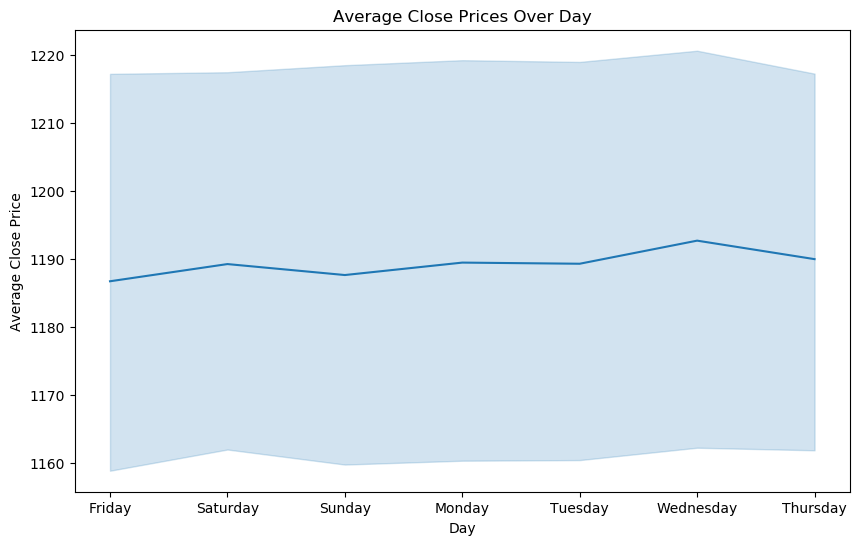

In [45]:
# Average close price over Day
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='close', data=data)
plt.title('Average Close Prices Over Day')
plt.xlabel('Day')
plt.ylabel('Average Close Price')
plt.show()

### from above graph we conclude that the crypto values are higher at Wedneshday and lower at friday

### Rel plot

<Figure size 1200x800 with 0 Axes>

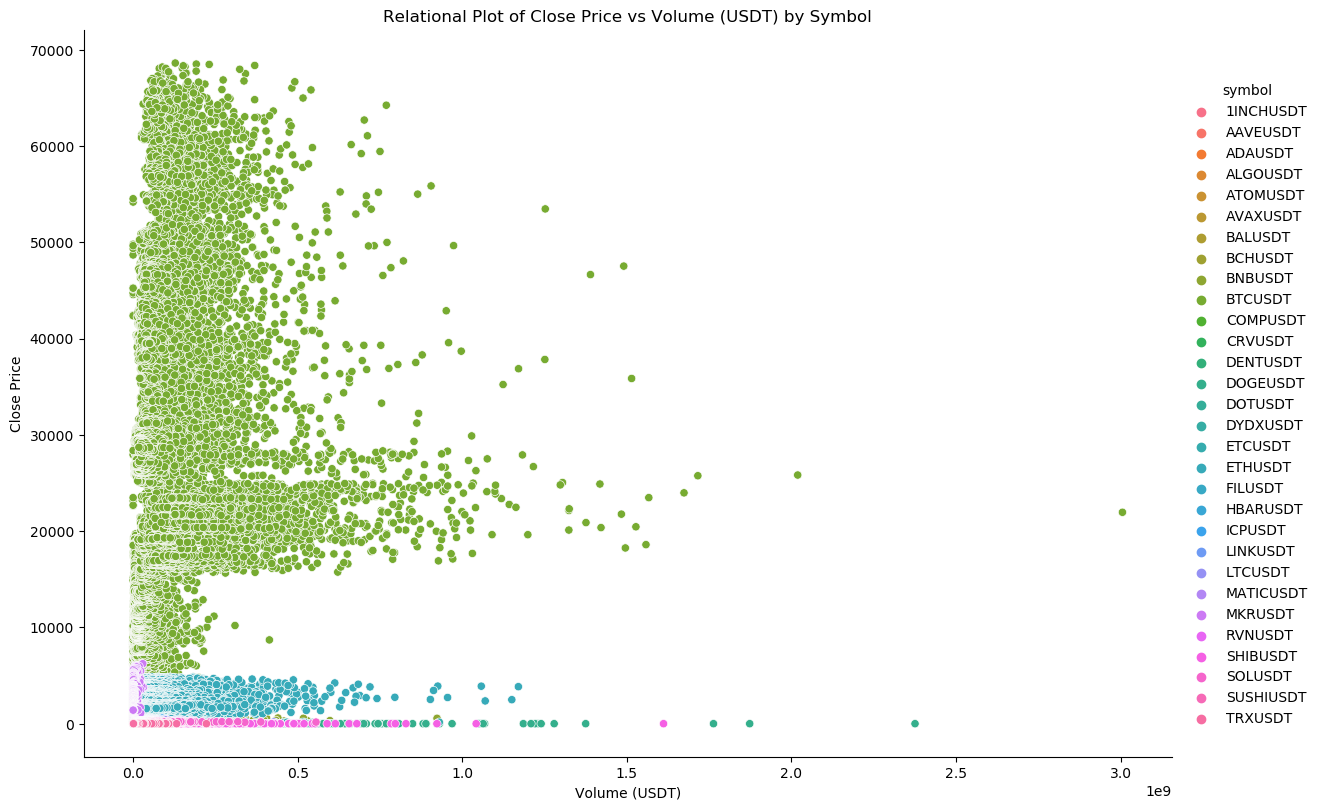

In [54]:
# Create a relational plot
plt.figure(figsize=(12, 8))
sns.relplot(x='volume usdt', y='close', hue='symbol', data=data, height=8, aspect=1.5)
plt.title('Relational Plot of Close Price vs Volume (USDT) by Symbol')
plt.xlabel('Volume (USDT)')
plt.ylabel('Close Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

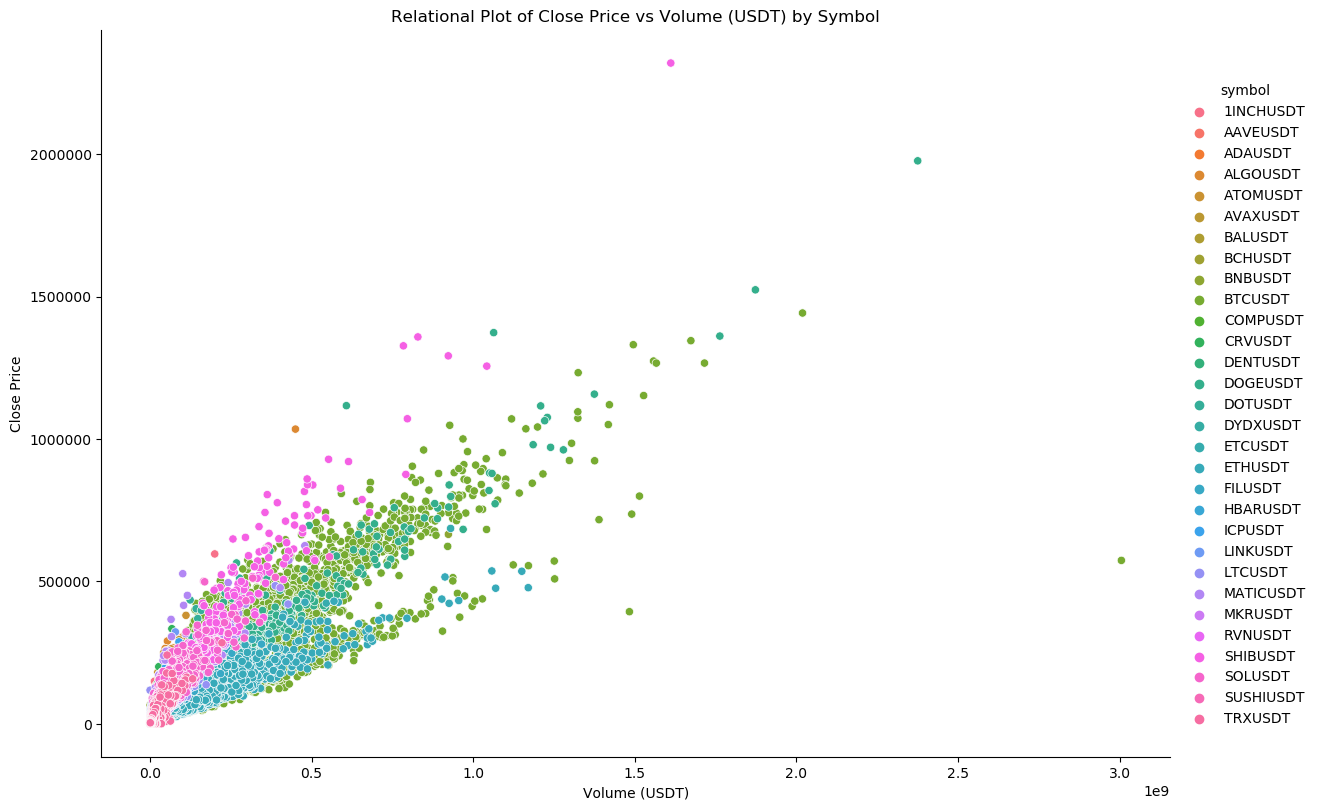

In [55]:

# Create a relational plot
plt.figure(figsize=(12, 8))
sns.relplot(x='volume usdt', y='tradecount', hue='symbol', data=data, height=8, aspect=1.5)
plt.title('Relational Plot of Close Price vs Volume (USDT) by Symbol')
plt.xlabel('Volume (USDT)')
plt.ylabel('Close Price')
plt.show()

In [57]:
data.head()

,symbol,close,volume usdt,tradecount,token,hour,day,month,week,year,volatility
0,1INCHUSDT,2.5826,35530516,48768,1INCH,5,Friday,12,52,2020,1444.250000
1,1INCHUSDT,2.5059,22440875,31099,1INCH,6,Friday,12,52,2020,20.904310
2,1INCHUSDT,2.6237,21300426,33001,1INCH,7,Friday,12,52,2020,22.283875
3,1INCHUSDT,2.6134,17491813,30459,1INCH,8,Friday,12,52,2020,14.592292
4,1INCHUSDT,2.6365,9919400,21023,1INCH,9,Friday,12,52,2020,7.292520


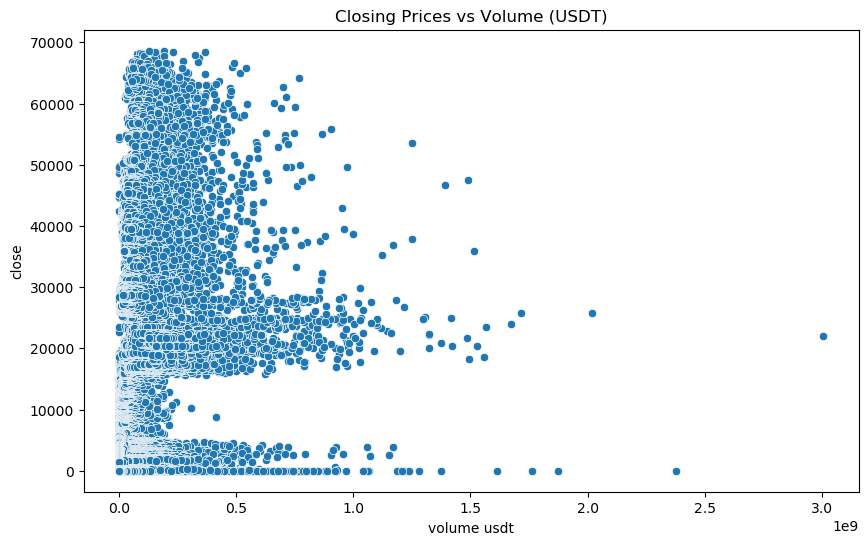

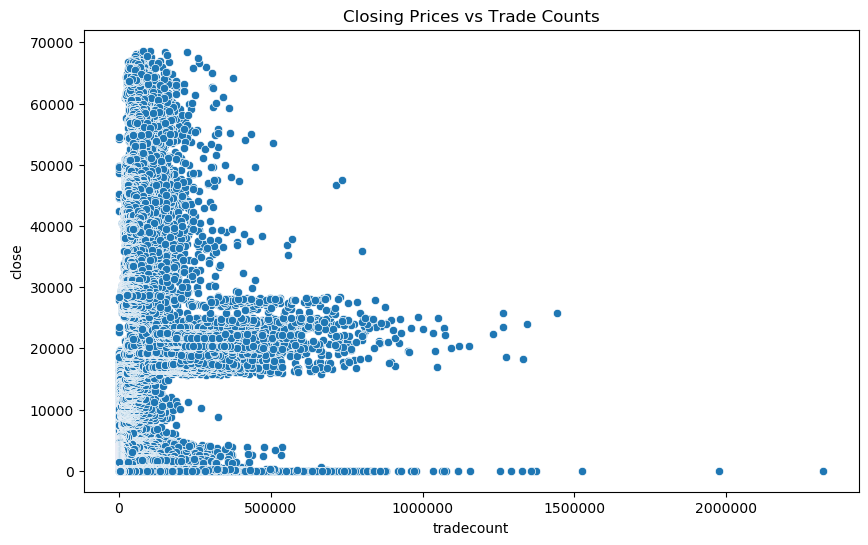

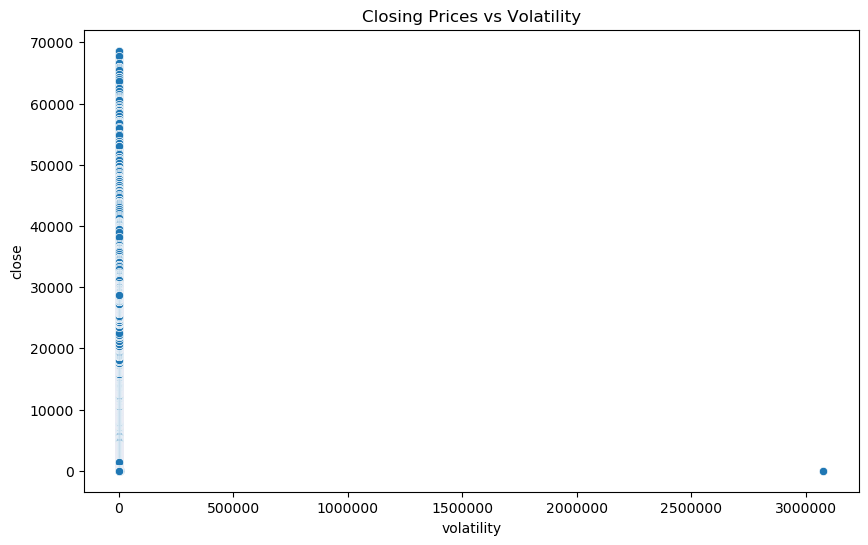

In [59]:

# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume usdt', y='close', data=data)
plt.title('Closing Prices vs Volume (USDT)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tradecount', y='close', data=data)
plt.title('Closing Prices vs Trade Counts')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatility', y='close', data=data)
plt.title('Closing Prices vs Volatility')
plt.show()

Conclusions
Distribution of Closing Prices:

The distribution plot of closing prices shows the frequency of different closing prices. This can help identify the most common closing price range for the cryptocurrency.
Distribution of Volume (USDT):

This plot reveals the distribution of trading volumes in USDT. High peaks can indicate frequent trading volumes within a certain range.
Distribution of Trade Counts:

The distribution of trade counts shows how often trades occur. This can highlight periods of high trading activity.
Distribution of Volatility:

This plot indicates the variability in the closing prices. Higher volatility suggests more significant price fluctuations.
Closing Prices by Day of the Week:

The box plot comparing closing prices by the day of the week can reveal if there are specific days when prices are typically higher or lower.
Closing Prices by Month:

The box plot for closing prices by month can show seasonal trends or significant changes across different months.
Correlation Matrix:

The heatmap of the correlation matrix shows relationships between numerical variables. For example, a high correlation between volume and closing prices may indicate that as trading volume increases, prices tend to increase as well.
Closing Prices vs Volume (USDT):

The scatter plot of closing prices versus trading volume can show if higher volumes correspond to higher or lower prices.
Closing Prices vs Trade Counts:

This scatter plot can highlight if there is a relationship between the number of trades and the closing prices.
Closing Prices vs Volatility:

The scatter plot of closing prices against volatility can indicate if higher price volatility corresponds to higher or lower closing prices.